# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

flight = pd.read_csv("flight.csv")

In [113]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [114]:
flight.describe(include="all")

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780,129780,129780,129780,129780,129780,129780.000000,129780.000000,129780.000000
unique,NaN,NaN,NaN,2,2,2,7,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,No,Yes,Yes,Saturday,No,Yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,90813,104028,116766,33736,123334,84643,NaN,NaN,NaN
mean,2006.224696,207.723155,13.162845,NaN,NaN,NaN,NaN,NaN,NaN,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,NaN,NaN,NaN,NaN,NaN,NaN,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,426.676250,1582.370000,4.000000


In [115]:
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


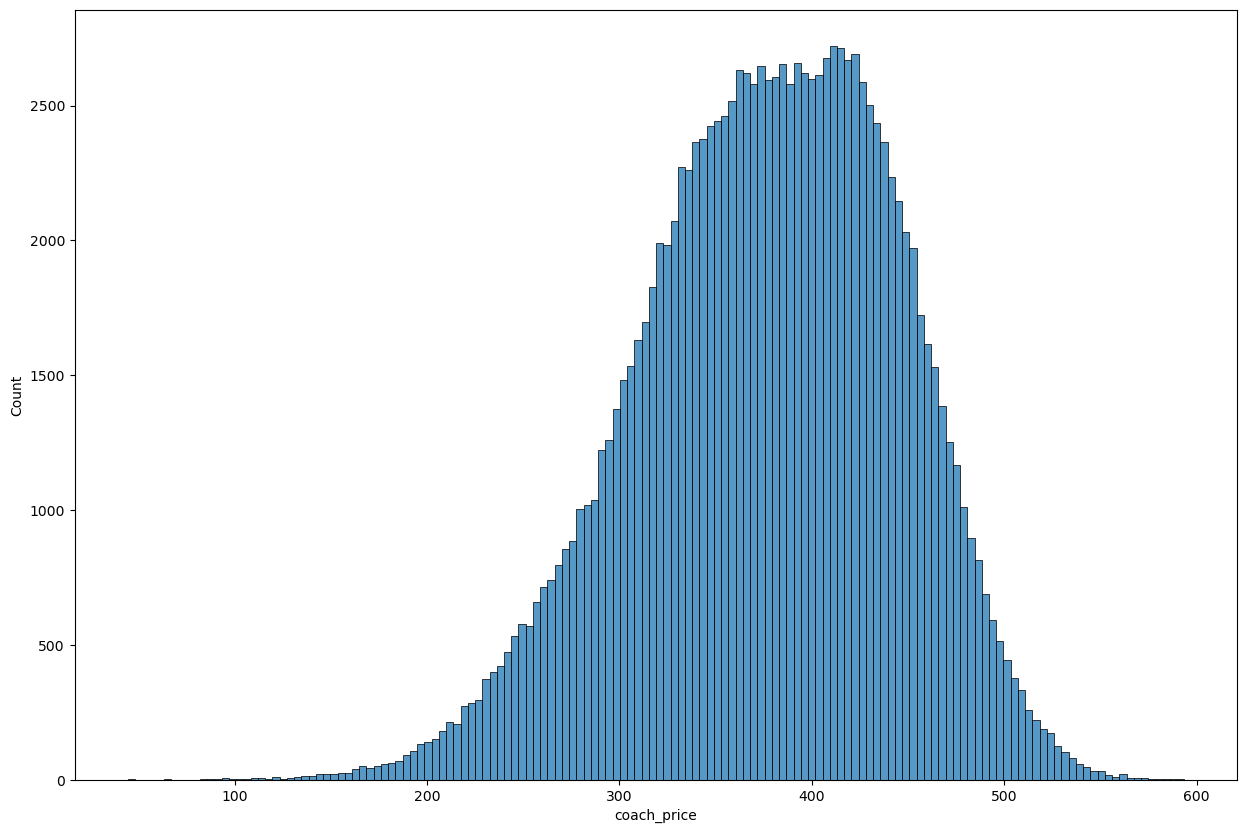

<Figure size 640x480 with 0 Axes>

In [116]:
plt.figure(figsize=(15,10))
sns.histplot(flight.coach_price)
plt.show()
plt.clf()

#### Coach price summary
- Coefficient of Variation: 67.74/376.58 = 0.17. We can see that mean and percentile 50% are close, 376.58 and 380.56 respectively. This suggests that the data points are closely clustered around the mean, implying low variability.
- Normally distributed.
- Maximum coach ticket is 593.63 and the cheapest is 44.41. Thus, 500 is not a good price for a coach ticket.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

Mean: 431.834377372817
Median: 437.115
Std: 64.07111469308155
Min: 170.77
Max: 593.635


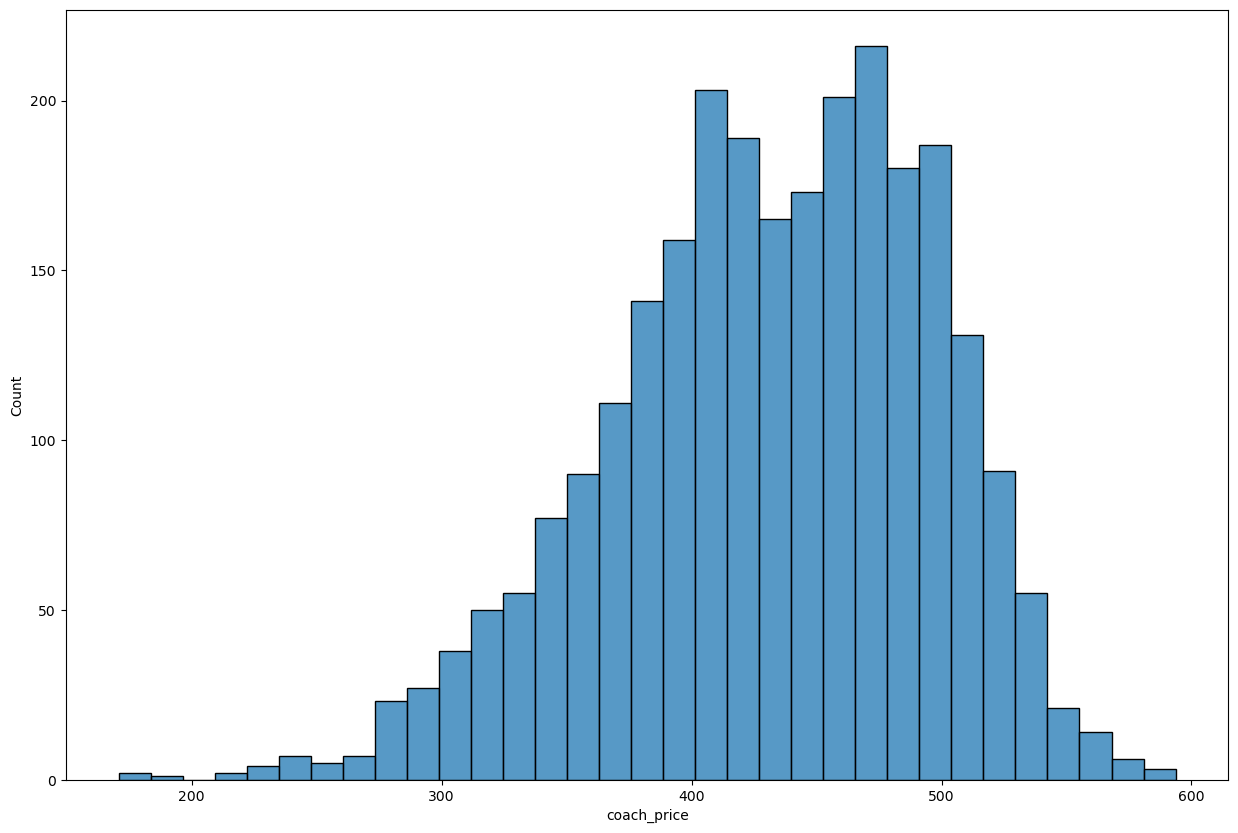

<Figure size 640x480 with 0 Axes>

In [117]:
eight_hours_flight = flight[flight["hours"] == 8]
print(f"Mean: {np.mean(eight_hours_flight['coach_price'])}")
print(f"Median: {np.median(eight_hours_flight['coach_price'])}")
print(f"Std: {np.std(eight_hours_flight['coach_price'])}")
print(f"Min: {np.min(eight_hours_flight['coach_price'])}")
print(f"Max: {np.max(eight_hours_flight['coach_price'])}")
plt.figure(figsize=(15,10))
sns.histplot(eight_hours_flight["coach_price"])
plt.show()
plt.clf()

#### Coach price for 8 hours flight summary
- Histogram appears to be left-skewed.
- Maximum coach price is 593.635 and minimum is 150.77.
- The average price is 431.83 is is higher than the average for all flights (376.585253). $500 dollar tickets seem more reasonable than before.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [118]:
flight["delay"].describe(include="all")

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

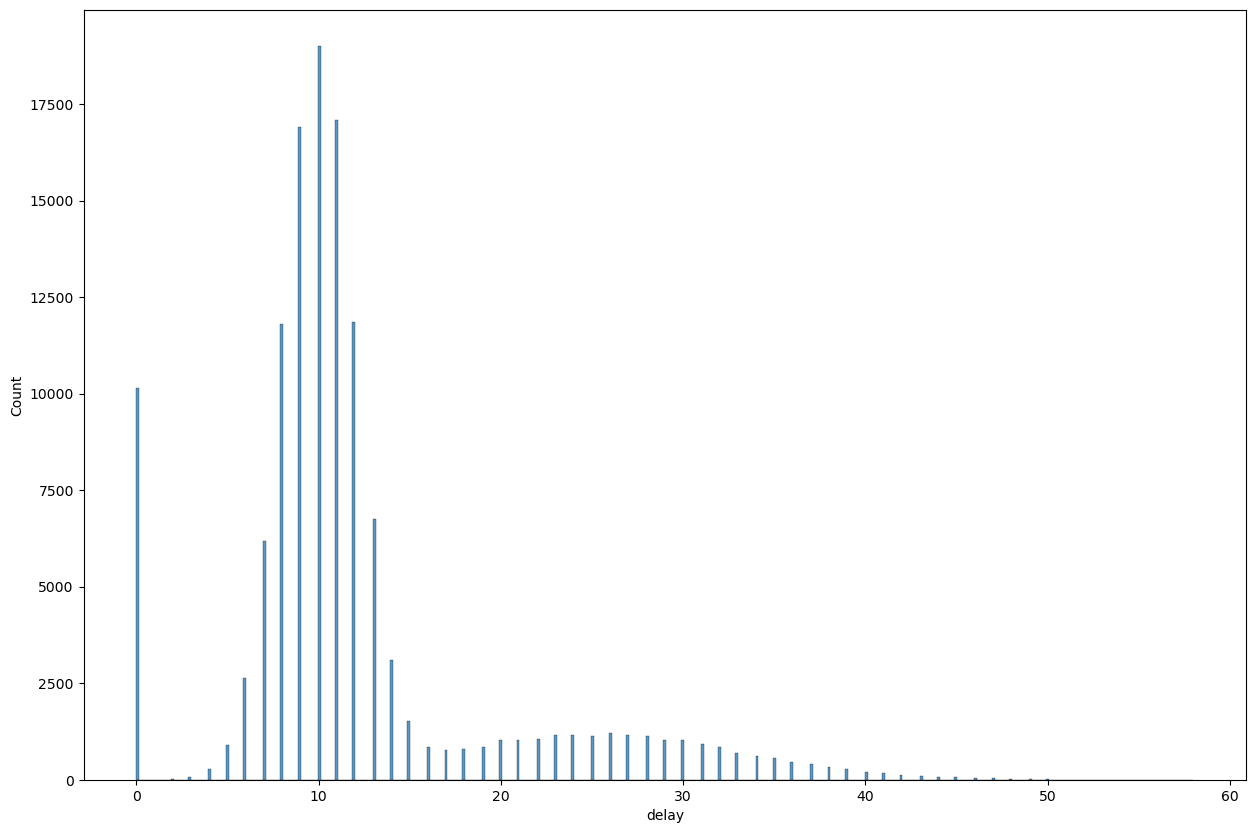

<Figure size 640x480 with 0 Axes>

In [119]:
plt.figure(figsize=(15,10))
sns.histplot(flight["delay"][flight["delay"] < 500])
plt.show()
plt.clf()

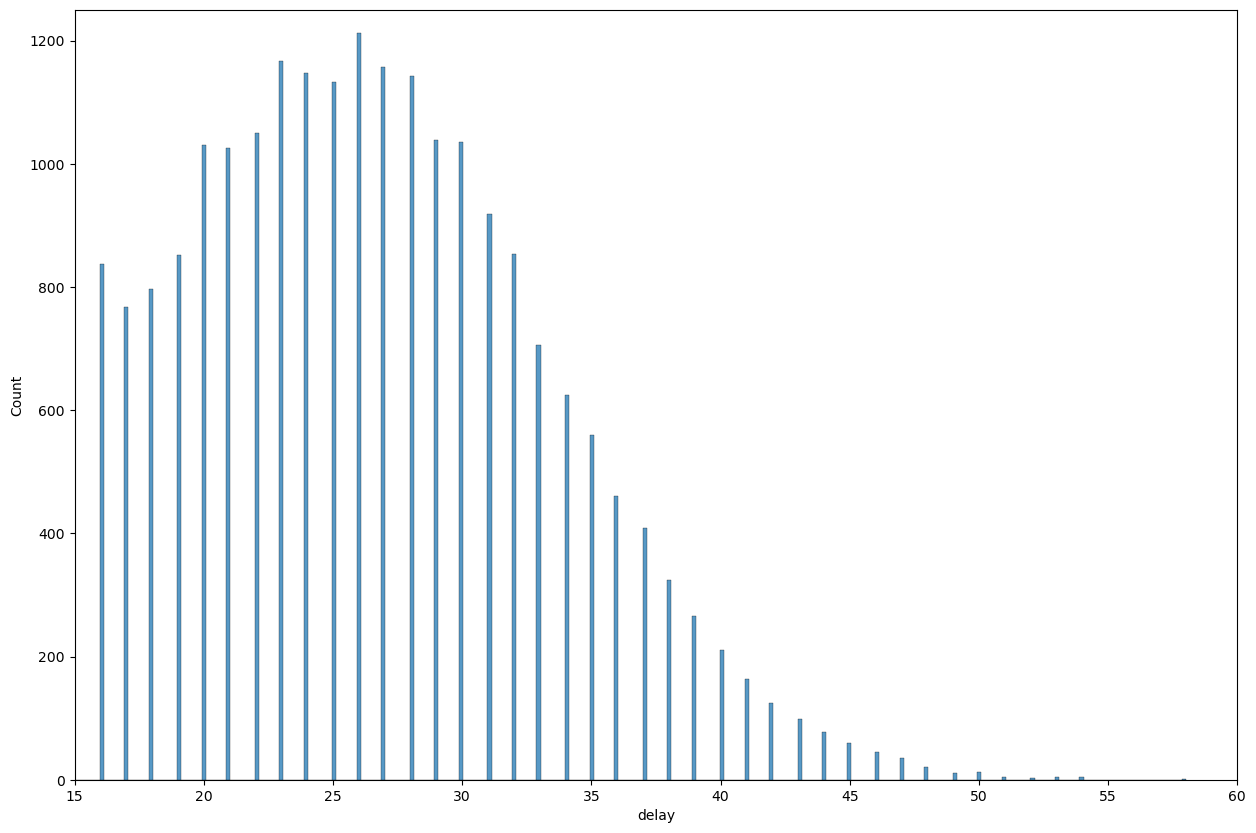

<Figure size 640x480 with 0 Axes>

In [120]:
plt.figure(figsize=(15,10))
sns.histplot(flight["delay"][flight["delay"] < 500])
plt.axis([15, 60, 0, 1250])
plt.show()
plt.clf()

In [121]:
delays_betwen_15_and_60 = flight["delay"][(flight["delay"] > 15) & (flight["delay"] < 60)]
delays_betwen_15_and_60.describe()

count    21386.000000
mean        26.765828
std          6.722334
min         16.000000
25%         22.000000
50%         26.000000
75%         31.000000
max         58.000000
Name: delay, dtype: float64

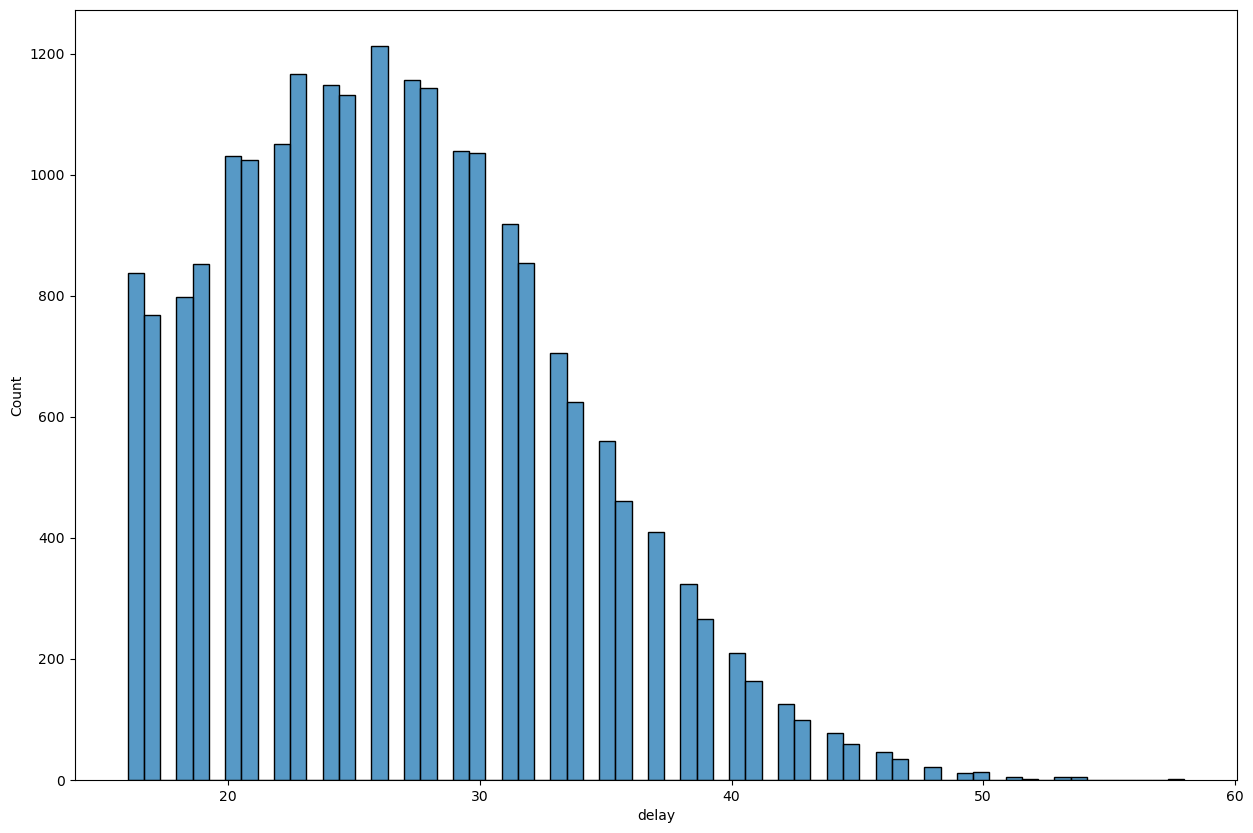

<Figure size 640x480 with 0 Axes>

In [122]:
plt.figure(figsize=(15,10))
sns.histplot(delays_betwen_15_and_60)
plt.show()
plt.clf()

In [123]:
delays_betwen_60_and_2000 = flight["delay"][(flight["delay"] > 60) & (flight["delay"] < 2000)]
delays_betwen_60_and_2000.describe()

count     100.000000
mean     1497.110000
std        19.664301
min      1446.000000
25%      1487.000000
50%      1496.000000
75%      1509.000000
max      1560.000000
Name: delay, dtype: float64

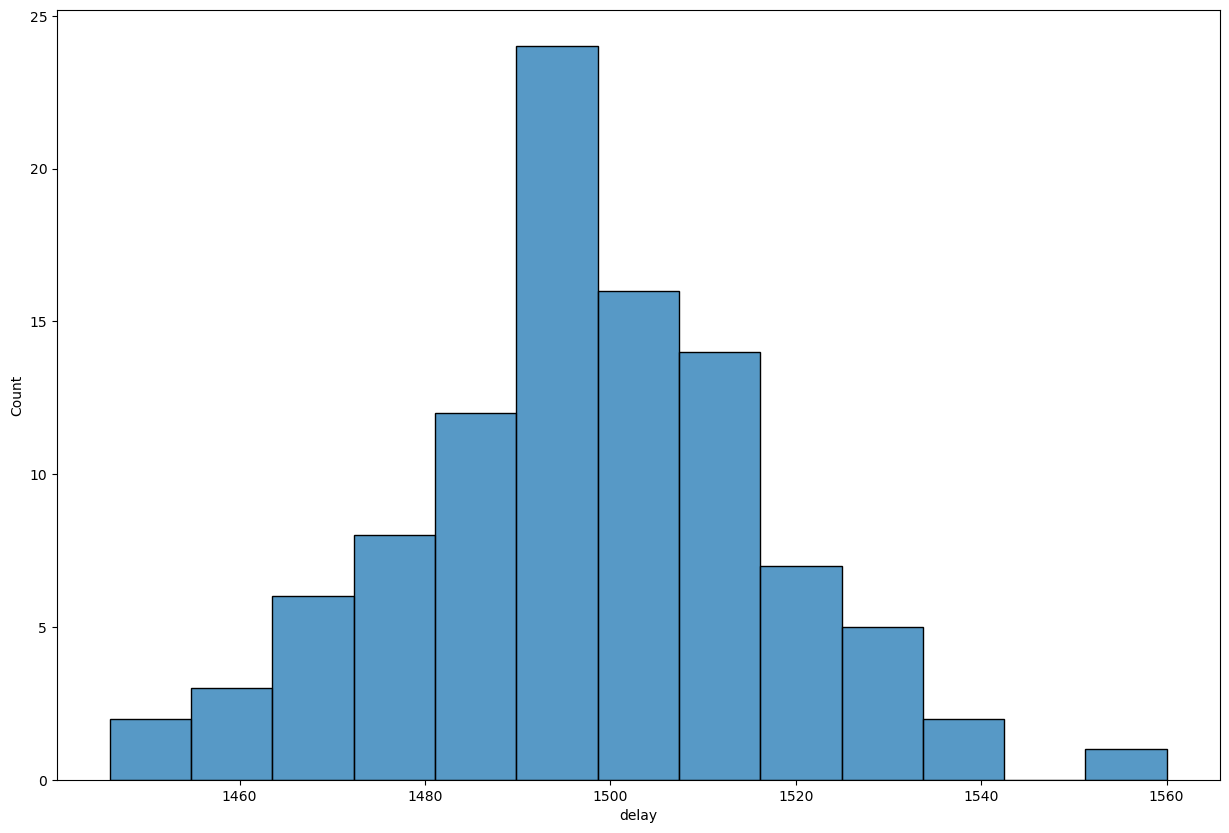

<Figure size 640x480 with 0 Axes>

In [124]:
plt.figure(figsize=(15,10))
sns.histplot(delays_betwen_60_and_2000)
plt.show()
plt.clf()

#### Delays summary

- Histogram is right-skewed and maximum delay of 1560 is an outlier.
- A typical delay in all flights (129780) is about 10 minutes.
- 21386 flights have a delay between 15 and 60 minutes with an average of 26.76 minutes.
- The minimum and maximum between 15 and 60 minutes are 16 and 58 minutes respectively.
- There are 100 outliers.
- The minimum and maximum between these outliers are 1446 and 1560 minutes respectively.
- The average between these outliers is 1497.11 minutes which are 24 flights.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

In [125]:
corr_coach_firstClass, pvalue = pearsonr(flight["coach_price"], flight["firstclass_price"])
print(f"Correlation: {corr_coach_firstClass}")
print(f"Correlation by random chance: {pvalue}")

Correlation: 0.7587565939365974
Correlation by random chance: 0.0


<Figure size 1500x1000 with 0 Axes>

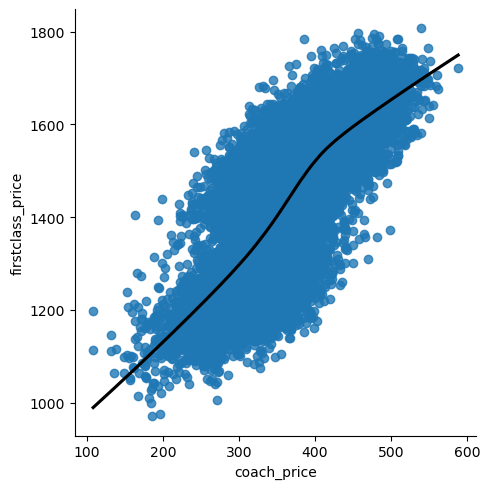

<Figure size 640x480 with 0 Axes>

In [126]:
# Too many data points to use directly a lmplot
# Let us use 10% of the data
plt.figure(figsize=(15,10))
perc = 0.1
rows_number = flight.shape[0]
ten_perc_flights = int(rows_number * perc)
sample_flights = flight.sample(n=ten_perc_flights)
sns.lmplot(data=sample_flights, x="coach_price", y="firstclass_price", lowess=True, line_kws={"color": "black"})
plt.show()
plt.clf()

#### Relationship between Coach and First Class price summary
- A correlation of 0.758 and a p-value of 0 suggest a strong relationship between these variables.
- Higher Coach prices always have higher first-class prices.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

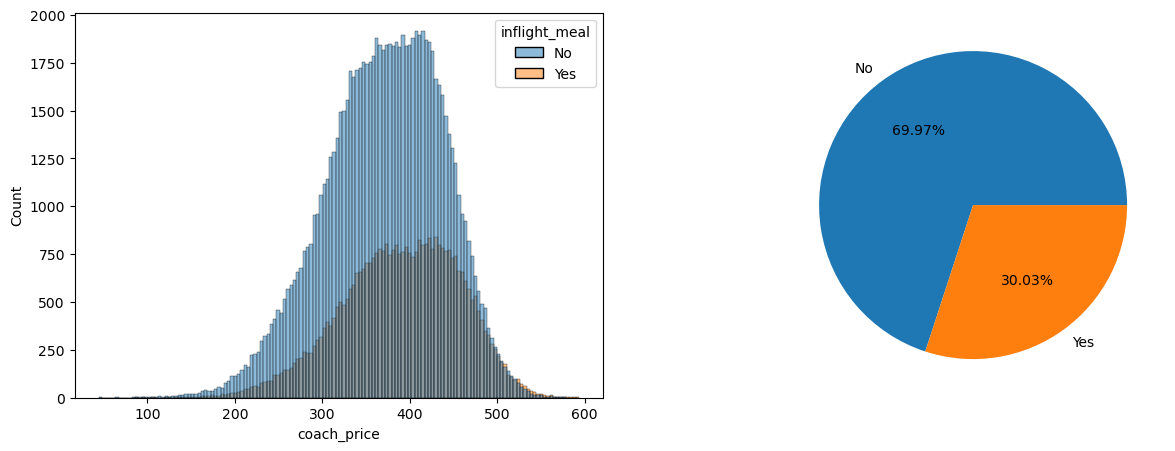

<Figure size 640x480 with 0 Axes>

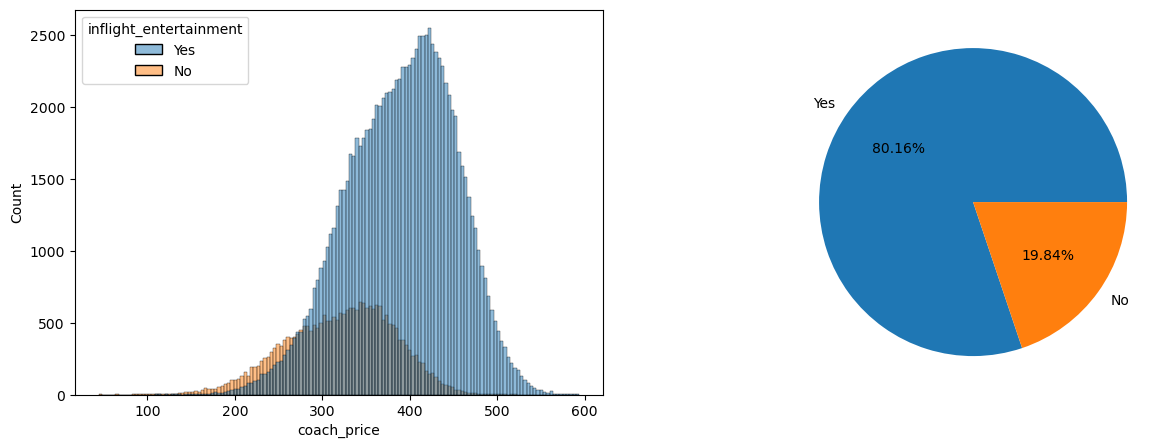

<Figure size 640x480 with 0 Axes>

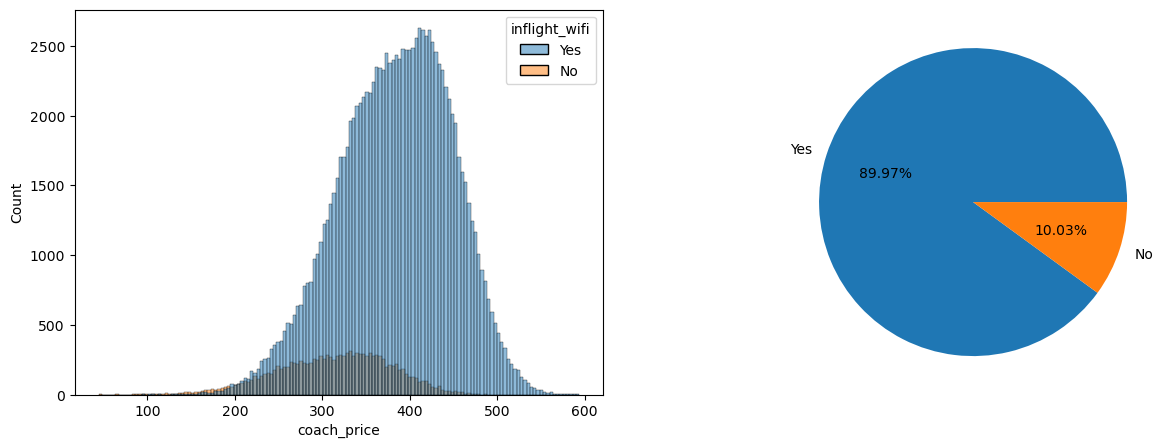

<Figure size 640x480 with 0 Axes>

In [127]:
# Inflight mean
meal_value_counts = flight["inflight_meal"].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(data=flight, x="coach_price", hue=flight.inflight_meal)
plt.subplot(1, 2, 2)
plt.pie(meal_value_counts.values, labels=meal_value_counts.index, autopct="%1.2f%%")
plt.show()
plt.clf()

# Inflight entertainment
entertainment_value_counts = flight["inflight_entertainment"].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1, 2 ,1)
sns.histplot(data=flight, x="coach_price", hue=flight.inflight_entertainment)
plt.subplot(1, 2, 2)
plt.pie(entertainment_value_counts.values, labels=entertainment_value_counts.index, autopct="%1.2f%%")
plt.show()
plt.clf()

# Inflight Wifi
wifi_value_counts = flight["inflight_wifi"].value_counts()
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=flight, x="coach_price", hue=flight.inflight_wifi)
plt.subplot(1, 2, 2)
plt.pie(wifi_value_counts.values, labels=wifi_value_counts.index, autopct="%1.2f%%")
plt.show()
plt.clf()

#### Inflight features summary
- Meal is the feature that most flights do not offer. Out of 129780, only 30.03% provides meals.
- Entertainment and wifi are the features that most flights offer, 80.16% and 89.97% respectively.
- All features are offered equally by price.

6. How does the number of passengers change in relation to the length of flights?

<Figure size 1500x1000 with 0 Axes>

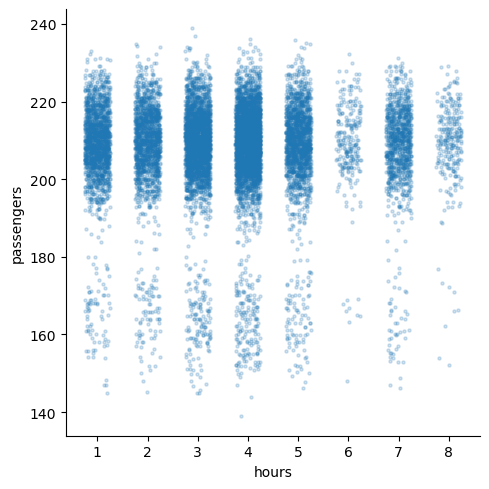

<Figure size 640x480 with 0 Axes>

In [128]:
plt.figure(figsize=(15,10))
sns.lmplot(data=sample_flights, x="hours", y="passengers", x_jitter=0.25, y_jitter=0.25, scatter_kws={"s": 5, "alpha": 0.2}, fit_reg=False)
plt.show()
plt.clf()

#### Passenger and Hours summary
- Most flights have around 210 passengers.
- There is a weak relation between passengers and hours.
- We can see that most people flights from 1 to 5 hours and 7 hours.
- For 6 and 8 hours there is a decrease with the number of passengers.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

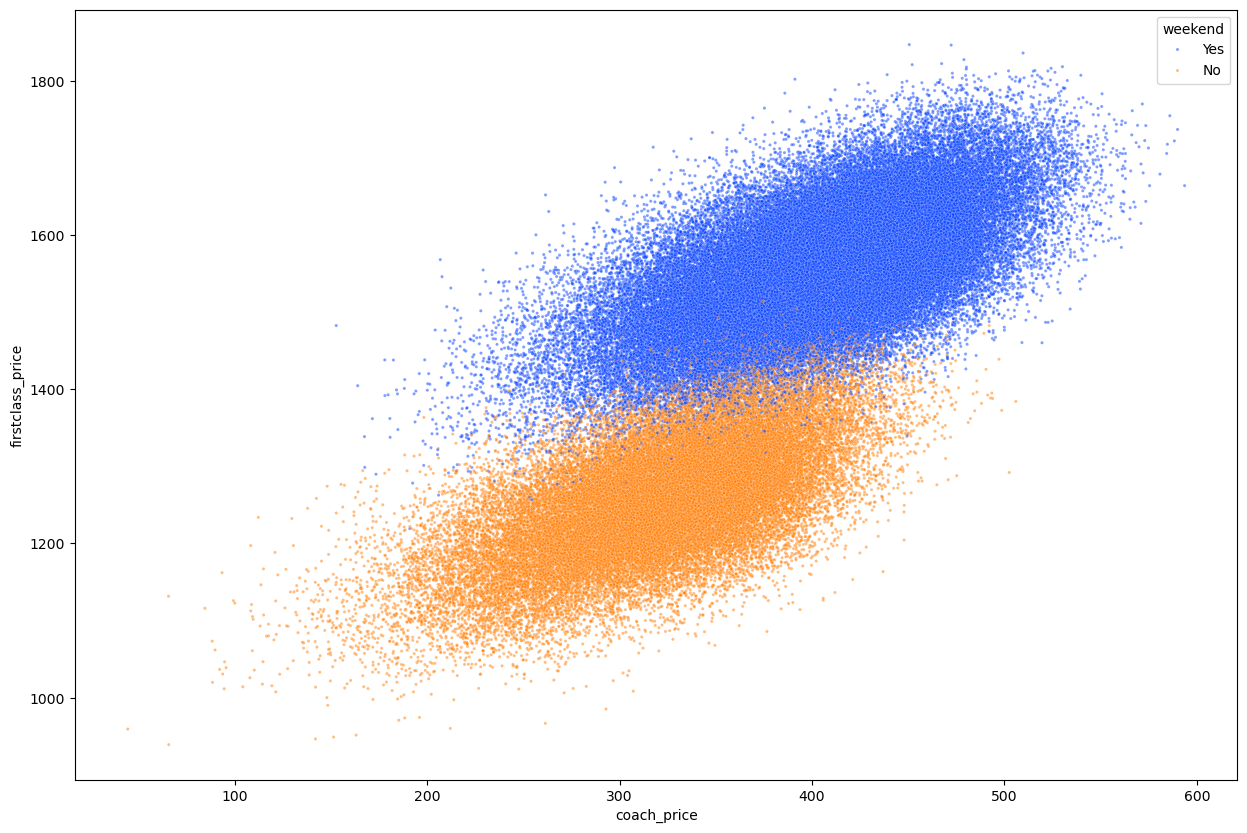

<Figure size 640x480 with 0 Axes>

In [129]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=flight, x="coach_price", y="firstclass_price", hue="weekend", palette="bright", s=5, alpha=0.5)
plt.show()
plt.clf()

#### Coach and first class on weekends summary
- As we saw previously, there is a general upward trend indicating that as the coach_price increases, the firstclass_price also increases.
- Scatter plot shows an increase for both first and coach prices on weekends.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

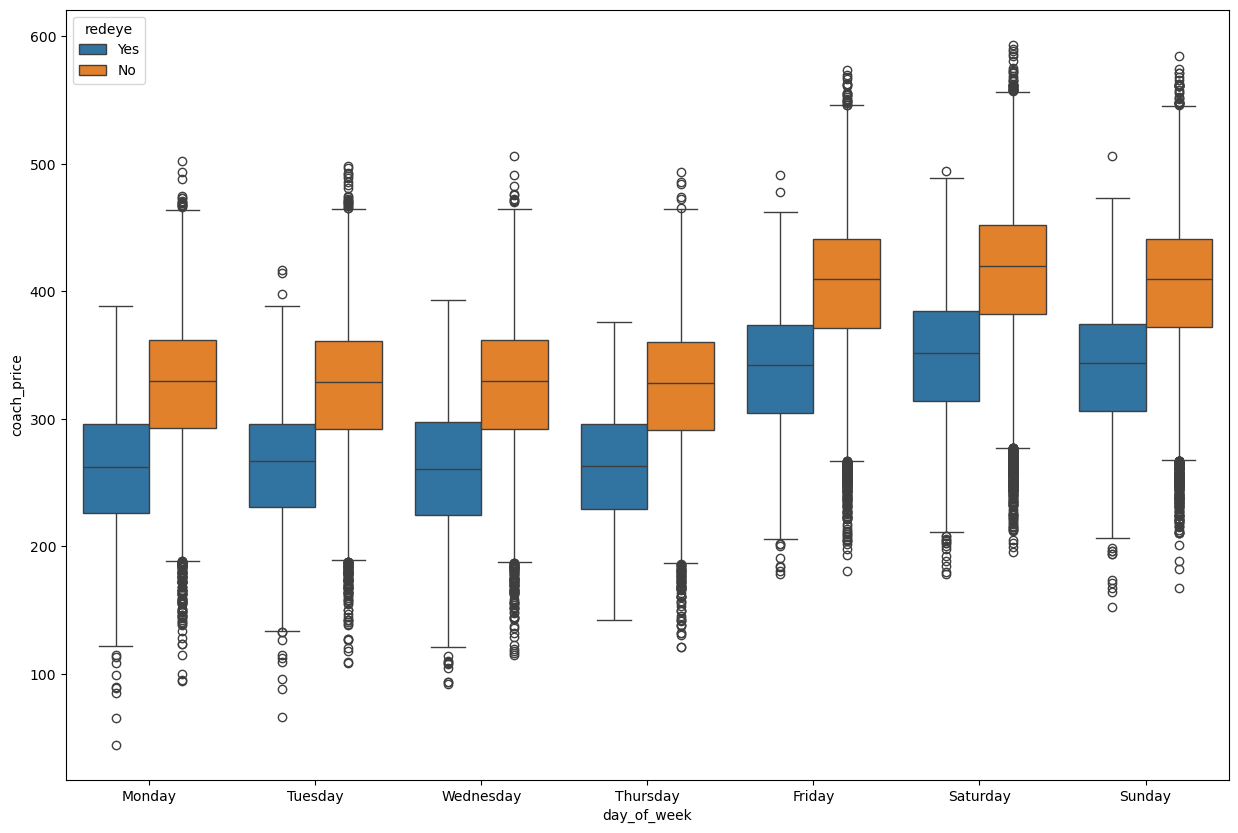

<Figure size 640x480 with 0 Axes>

In [130]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(15,10))
sns.boxplot(data=flight, x="day_of_week", y="coach_price", hue="redeye", order=days_order)
plt.show()
plt.clf()

#### Redeyes and non-redeyes on each day of the week summary

- The cheapest coach prices are those with redeyes, especially from Monday to Thursday.
- Flights with non-redeyes from Monday to Thursday are cheaper than flights with redeyes from Friday to Sunday. Which makes sanse because people are bussy on weekdays.
- Most expensive coach prices non-redeyes from Friday to Sunday.

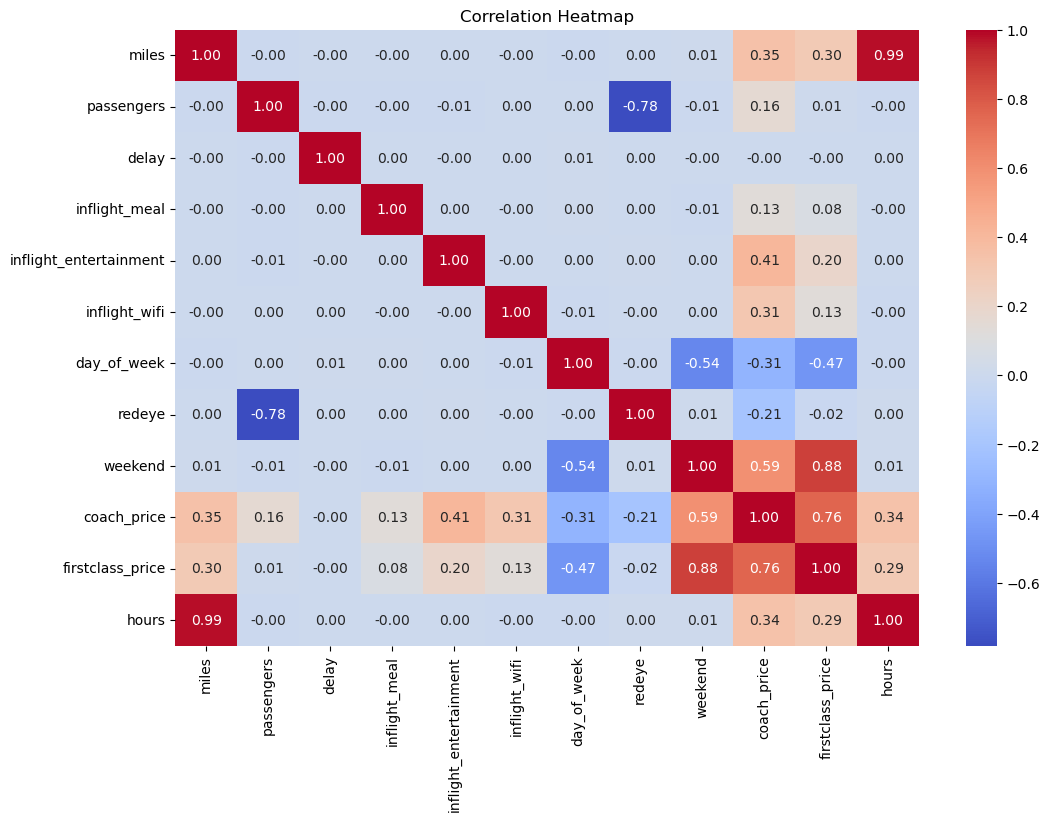

In [131]:
# Heatmap for correlation
flight['inflight_meal'] = flight['inflight_meal'].map({'Yes': 1, 'No': 0})
flight['inflight_entertainment'] = flight['inflight_entertainment'].map({'Yes': 1, 'No': 0})
flight['inflight_wifi'] = flight['inflight_wifi'].map({'Yes': 1, 'No': 0})
flight['redeye'] = flight['redeye'].map({'Yes': 1, 'No': 0})
flight['weekend'] = flight['weekend'].map({'Yes': 1, 'No': 0})
flight['day_of_week'] = flight['day_of_week'].astype('category').cat.codes

# Calculate the correlation matrix
correlation = flight.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()